In [1]:
import pandas as pd #basically pandas is used to perform different analysis on data
import numpy as np #Numpy stands for numperical python used to perform numerical calculation on the data
import seaborn as sns #Seaborn and matplotlib both are used to visualise the different insights of data
import matplotlib.pyplot as plt

In [2]:
olist_customers_dataset=pd.read_csv("olist_customers_dataset.csv") 
olist_order_items_dataset=pd.read_csv("olist_order_items_dataset.csv")
olist_order_payments_dataset=pd.read_csv("olist_order_payments_dataset.csv")
olist_order_reviews_dataset=pd.read_csv("olist_order_reviews_dataset.csv")
olist_orders_dataset=pd.read_csv("olist_orders_dataset.csv")
olist_products_dataset=pd.read_csv("olist_products_dataset.csv")
olist_sellers_dataset=pd.read_csv("olist_sellers_dataset.csv")
product_category_name_translation=pd.read_csv("product_category_name_translation.csv")
olist_geolocation_dataset=pd.read_csv("olist_geolocation_dataset.csv")

In [3]:
merged_df = olist_orders_dataset.merge(olist_customers_dataset, on="customer_id", how="left")
merged_df = merged_df.merge(olist_order_reviews_dataset, on="order_id", how="left")
merged_df = merged_df.merge(olist_order_payments_dataset, on="order_id", how="left")
merged_df = merged_df.merge(olist_order_items_dataset, on="order_id", how="left")
merged_df = merged_df.merge(olist_products_dataset, on="product_id", how="left")
merged_df = merged_df.merge(olist_sellers_dataset, on="seller_id", how="left")

In [4]:
#Converting the product category names from brazilian language to normal english language
translation_dict = dict(zip(product_category_name_translation['product_category_name'], 
                            product_category_name_translation['product_category_name_english']))
def translate_category(category):
    if pd.isna(category):  
        return ""  
    words = category.split()  
    translated_words = [translation_dict.get(word, word) for word in words] 
    return ' '.join(translated_words)  
merged_df['product_category_name'] = merged_df['product_category_name'].apply(translate_category)

In [5]:
merged_df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_zip_code_prefix', 'seller_city', 'seller_state'],
      dtype='object')

In [6]:
#Removing all the outliers by using IQR that is inter quartile range for better analaysis of data
def remove_outliers_iqr(df):
    Q1 = df.quantile(0.25)  # First quartile
    Q3 = df.quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]
df_numeric = merged_df.select_dtypes(include=['number'])
df_cleaned = remove_outliers_iqr(df_numeric)

In [7]:
df_non_numeric = merged_df.select_dtypes(exclude=['number'])

In [8]:
df_cleaned['order_id'] = merged_df['order_id']

/tmp/ipykernel_104874/4049919004.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['order_id'] = merged_df['order_id']


In [9]:
df_non_numeric['order_id'] = merged_df['order_id']

In [10]:
df = pd.merge(df_non_numeric, df_cleaned, how='inner', on='order_id')

In [11]:
desc_stats=df.describe()
desc_stats

,customer_zip_code_prefix,review_score,payment_sequential,payment_installments,payment_value,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix
count,55711.000000,55193.000000,55711.0,55711.000000,55711.000000,55549.0,55549.000000,55549.000000,54549.000000,54549.000000,54549.000000,55533.000000,55533.000000,55533.000000,55533.000000,55549.000000
mean,32272.830464,4.575127,1.0,2.243363,95.283940,1.0,69.306801,14.800225,48.767970,623.108636,2.038479,765.958835,26.374354,12.676499,20.779969,12798.609462
std,29111.153356,0.668200,0.0,1.847791,66.395382,0.0,51.347380,4.861657,9.764879,392.535574,1.384212,743.938063,11.220746,7.869667,8.830885,9549.804386
min,1003.000000,3.000000,1.0,1.000000,0.000000,1.0,0.850000,1.010000,20.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1001.000000
25%,9220.000000,4.000000,1.0,1.000000,46.780000,1.0,29.990000,11.850000,42.000000,328.000000,1.000000,250.000000,17.000000,7.000000,14.000000,4782.000000
50%,22021.000000,5.000000,1.0,1.000000,76.210000,1.0,53.990000,15.100000,51.000000,537.000000,1.000000,487.000000,22.000000,11.000000,18.000000,13030.000000
75%,45027.500000,5.000000,1.0,3.000000,127.460000,1.0,90.490000,17.740000,57.000000,855.000000,3.000000,1100.000000,32.000000,17.000000,26.000000,14940.000000
max,99980.000000,5.000000,1.0,8.000000,381.570000,1.0,277.000000,33.310000,76.000000,1936.000000,6.000000,4050.000000,68.000000,38.000000,52.000000,60110.000000


In [12]:
merged_df = merged_df.drop(columns=['review_comment_title'], errors='ignore')

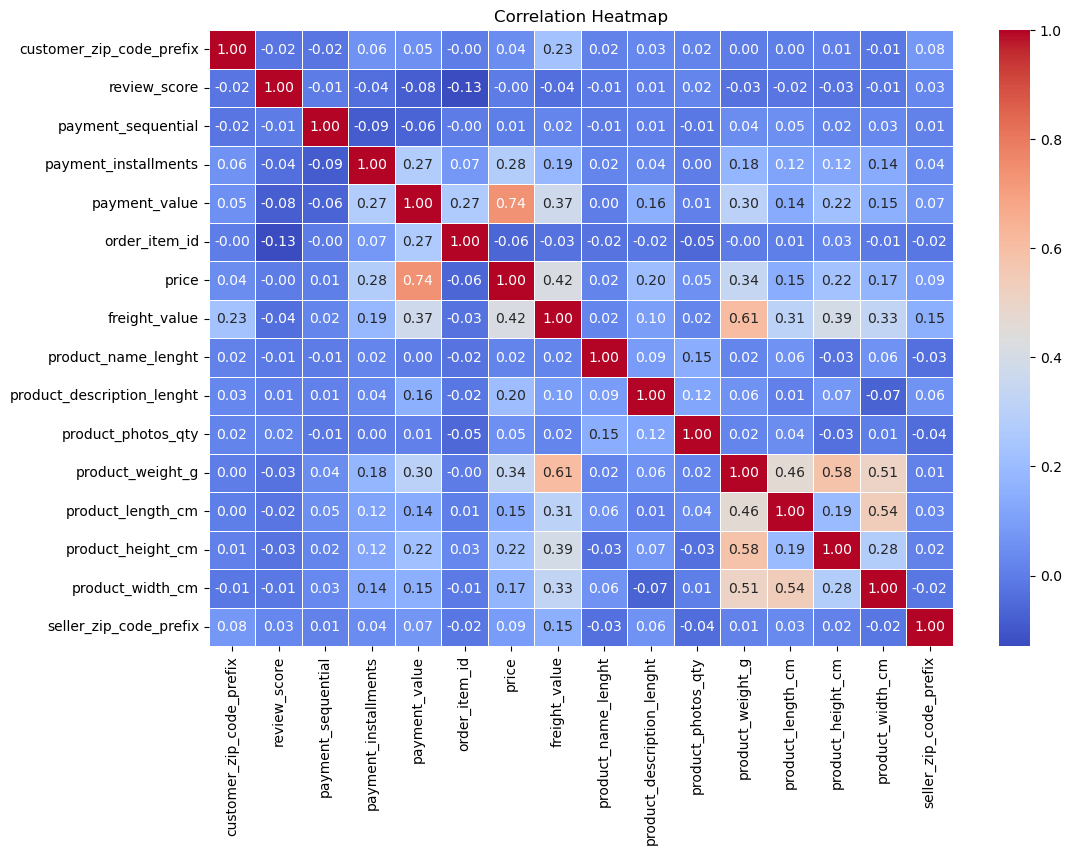

In [13]:
correlation_matrix = df_numeric.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [14]:
df['product_name_lenght'] = df['product_name_lenght'].fillna(df['product_name_lenght'].mean())
df['product_description_lenght'] = df['product_description_lenght'].fillna(df['product_description_lenght'].mean())
df['product_photos_qty'] = df['product_photos_qty'].fillna(df['product_photos_qty'].mean())

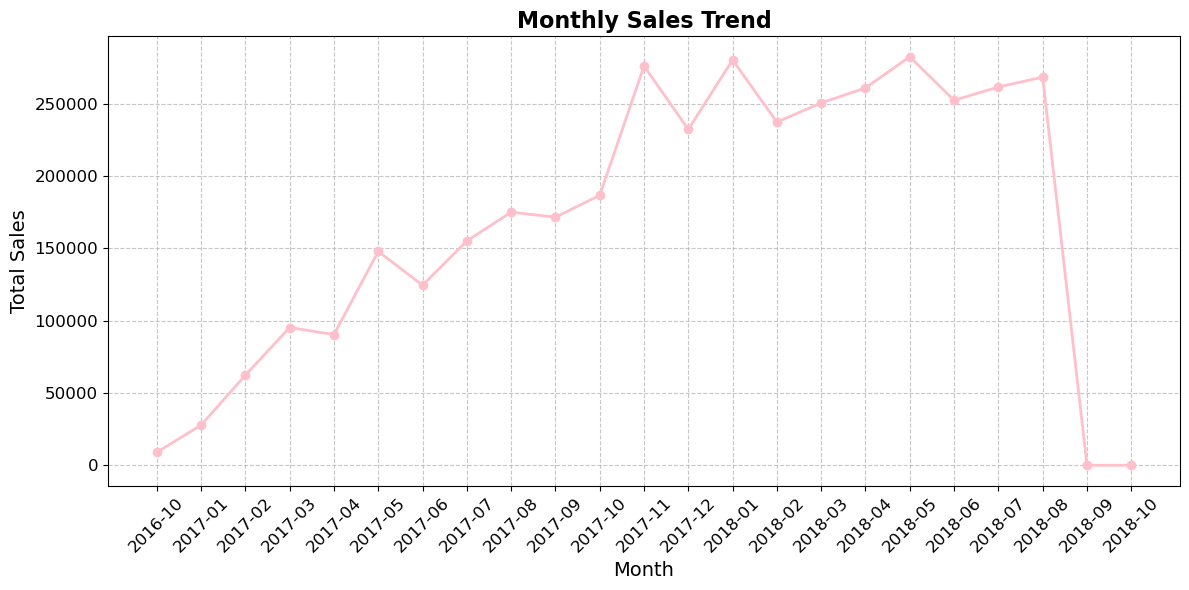

In [15]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'], errors='coerce')
monthly_sales = df.groupby(df['order_purchase_timestamp'].dt.to_period('M')).agg({'price': 'sum'})
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index.astype(str).to_numpy(), 
         monthly_sales['price'].to_numpy(), 
         marker='o', linestyle='-', color="pink", linewidth=2)
plt.title('Monthly Sales Trend', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [16]:
df['order_month'] = df['order_purchase_timestamp'].dt.to_period('M')

In [17]:
max_sales_month_data = df[df['order_month'] == '2017-11']
min_sales_month_data = df[df['order_month'] == '2018-09']

In [18]:
min_sales_month_data

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,...,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,order_month
11607,4d59cc2a2e7bb6c0a851725f5888a9b5,ead83a4f8f7be8c3034b2e98754a6147,canceled,2018-09-06 14:50:07,NaN,NaN,NaN,2018-09-21 00:00:00,230a1e9f42924d41f37fd22a1d4a9707,santana de parnaiba,...,NaN,48.76797,623.108636,2.038479,NaN,NaN,NaN,NaN,NaN,2018-09
22424,4637ca194b6387e2d538dc89b124b0ee,a73c1f73f5772cf801434bf984b0b1a7,canceled,2018-09-03 14:14:25,NaN,NaN,NaN,2018-09-10 00:00:00,968fac81e2c44fb6c1e3ac2a45e6a102,sao paulo,...,NaN,48.76797,623.108636,2.038479,NaN,NaN,NaN,NaN,NaN,2018-09
55674,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00,d05c44a138277ad325d915c6b7ccbcdf,sao paulo,...,NaN,48.76797,623.108636,2.038479,NaN,NaN,NaN,NaN,NaN,2018-09


In [19]:
max_sales_month_data

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,...,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,order_month
5,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,...,27.20,59.0,468.0,3.0,450.0,30.0,10.0,20.0,31842.0,2017-11
11,85ce859fd6dc634de8d2f1e290444043,059f7fc5719c7da6cbafe370971a8d70,delivered,2017-11-21 00:03:41,2017-11-21 00:14:22,2017-11-23 21:32:26,2017-11-27 18:28:00,2017-12-11 00:00:00,d0ff1a7468fcc46b8fc658ab35d2a12c,hortolandia,...,11.85,43.0,125.0,1.0,250.0,40.0,4.0,30.0,14940.0,2017-11
31,68873cf91053cd11e6b49a766db5af1a,4632eb5a8f175f6fe020520ae0c678f3,delivered,2017-11-30 22:02:15,2017-12-02 02:51:18,2017-12-04 22:07:01,2017-12-05 20:28:40,2017-12-18 00:00:00,6da92ae920ab16fc4eceb8fcd7bd43ce,sao paulo,...,11.76,52.0,530.0,6.0,949.0,30.0,20.0,26.0,3809.0,2017-11
61,8fc207e94fa91a7649c5a5dab690272a,c69f8b33e62ecb30ff78ae46d7fb9241,delivered,2017-11-26 17:49:46,2017-11-26 17:58:34,2017-11-28 23:17:09,2018-01-20 13:42:22,2017-12-19 00:00:00,7d185d821a11c769636247766f1fd45e,sao joao de meriti,...,25.61,53.0,236.0,2.0,1975.0,41.0,13.0,31.0,14940.0,2017-11
67,5447160f15621601fa9ba2b94f4906b3,9c338ea8093192e203bc16add78c123c,delivered,2017-11-21 12:08:32,2017-11-21 12:40:55,2017-11-22 20:17:08,2017-11-28 20:33:38,2017-12-14 00:00:00,5179541696b879141c1f0bb532f988c9,curitiba,...,15.77,35.0,591.0,3.0,444.0,20.0,14.0,16.0,14850.0,2017-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55679,7f19df33207d507c5b83aef798aff0d2,35939fb9cef5fb267abdccfe56f1de5e,delivered,2017-11-30 11:06:56,2017-12-02 02:51:28,2017-12-04 22:46:47,2017-12-21 21:19:03,2017-12-28 00:00:00,e4448533ef66ef633b36b10d6a00e5f2,ilhabela,...,16.11,56.0,963.0,1.0,1100.0,16.0,15.0,15.0,31573.0,2017-11
55693,29b199897e15bd5a4b501cf5eee8b948,530575e87308897d871c2008d28713dc,delivered,2017-11-19 18:00:41,2017-11-19 18:15:32,2017-11-22 19:08:33,2017-11-27 23:11:55,2017-12-12 00:00:00,3b6572635fb53a6846bacb6947a91e93,tres coracoes,...,18.14,52.0,431.0,1.0,1900.0,49.0,12.0,36.0,23050.0,2017-11
55697,a2a701c6f01ddffde8a1bde136ed7d4a,8543703cb2bc95c3606af4af727d604f,delivered,2017-11-26 10:26:55,2017-11-26 10:36:06,2017-11-27 22:49:48,2017-12-16 02:54:56,2018-01-03 00:00:00,21ad443c5dd9c2d257fd514ec411d183,belem,...,25.63,31.0,694.0,1.0,167.0,16.0,14.0,13.0,14092.0,2017-11
55700,4146f35ac7a7ef4e39fe344e563c1e3b,e0eac226ceae49858de89e8a5c1ba1ec,delivered,2017-11-26 19:42:22,2017-11-26 19:53:48,2017-11-27 18:33:24,2017-12-05 18:38:40,2017-12-15 00:00:00,7d414b6a1cf56a6bc5035f9eb436b15d,cordeiropolis,...,12.40,60.0,491.0,2.0,250.0,16.0,2.0,11.0,5849.0,2017-11


In [20]:
min_sales_month_data = df[df['order_month'] == '2018-09']
min_sales_month_data

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,...,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,order_month
11607,4d59cc2a2e7bb6c0a851725f5888a9b5,ead83a4f8f7be8c3034b2e98754a6147,canceled,2018-09-06 14:50:07,NaN,NaN,NaN,2018-09-21 00:00:00,230a1e9f42924d41f37fd22a1d4a9707,santana de parnaiba,...,NaN,48.76797,623.108636,2.038479,NaN,NaN,NaN,NaN,NaN,2018-09
22424,4637ca194b6387e2d538dc89b124b0ee,a73c1f73f5772cf801434bf984b0b1a7,canceled,2018-09-03 14:14:25,NaN,NaN,NaN,2018-09-10 00:00:00,968fac81e2c44fb6c1e3ac2a45e6a102,sao paulo,...,NaN,48.76797,623.108636,2.038479,NaN,NaN,NaN,NaN,NaN,2018-09
55674,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00,d05c44a138277ad325d915c6b7ccbcdf,sao paulo,...,NaN,48.76797,623.108636,2.038479,NaN,NaN,NaN,NaN,NaN,2018-09


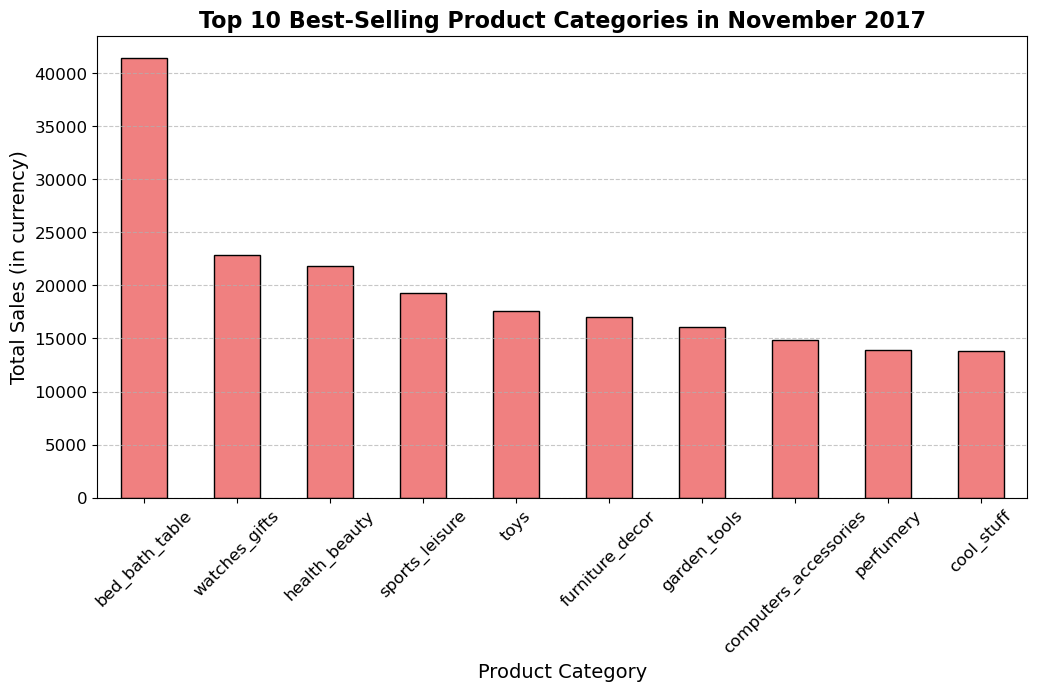

In [21]:
product_sales = max_sales_month_data.groupby('product_category_name')['price'].sum().sort_values(ascending=False)
# Plotting top 10 selling product categories
plt.figure(figsize=(12, 6))
product_sales.head(10).plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Top 10 Best-Selling Product Categories in November 2017', fontsize=16, fontweight='bold')
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Total Sales (in currency)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [22]:
mean_review_scores = df.groupby('product_category_name')['review_score'].mean().reset_index()
mean_review_scores.sample(7)

,product_category_name,review_score
18,construction_tools_construction,4.595808
68,stationery,4.689216
60,perfumery,4.651351
6,auto,4.568123
67,sports_leisure,4.590655
29,fashion_bags_accessories,4.568165
66,small_appliances_home_oven_and_coffee,4.681818


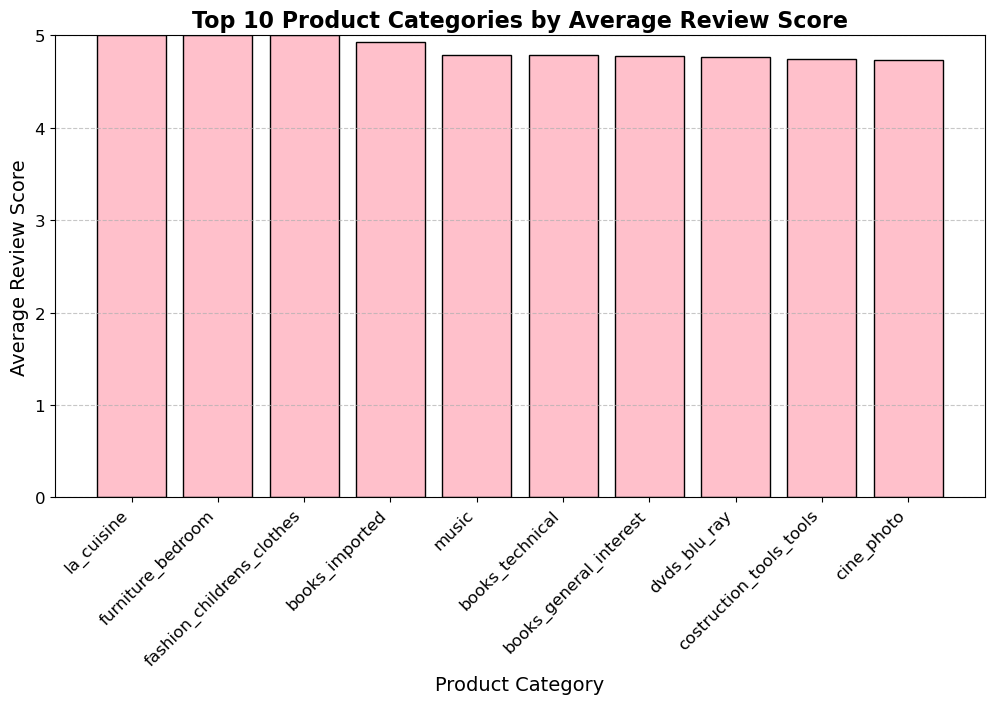

In [23]:
df_filtered = df[df['product_category_name'].str.strip() != ""]
mean_review_scores = df_filtered.groupby('product_category_name')['review_score'].mean().sort_values(ascending=False)
top_10_review_scores = mean_review_scores.head(10)
plt.figure(figsize=(12, 6))
plt.bar(top_10_review_scores.index, top_10_review_scores.values, color= "pink", edgecolor='black')
plt.title('Top 10 Product Categories by Average Review Score', fontsize=16, fontweight='bold')
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Average Review Score', fontsize=14)
plt.xticks(rotation=45, fontsize=12, ha='right')  # Rotate for readability
plt.yticks(fontsize=12)
plt.ylim(0, 5)  # Review scores range from 0 to 5
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

In [24]:
df["total_price_prod"]=((df["price"]+df["freight_value"])*df["order_item_id"])

In [25]:
high_review_price = df.groupby('product_category_name').agg(
    average_review_score=('review_score', 'mean'),
    average_price=('total_price_prod', 'mean')
).reset_index()
high_review_price = high_review_price.sort_values(by='average_review_score', ascending=False)
print(high_review_price.head(10))

        product_category_name  average_review_score  average_price
52                 la_cuisine              5.000000     147.150000
39          furniture_bedroom              5.000000      51.880000
30  fashion_childrens_clothes              5.000000     112.005000
10             books_imported              4.931818      72.221818
55                      music              4.789474      51.923158
11            books_technical              4.785276      75.611030
9      books_general_interest              4.779359      65.641986
26               dvds_blu_ray              4.769231      76.190769
23    costruction_tools_tools              4.745455      86.209661
14                 cine_photo              4.739130      65.464130


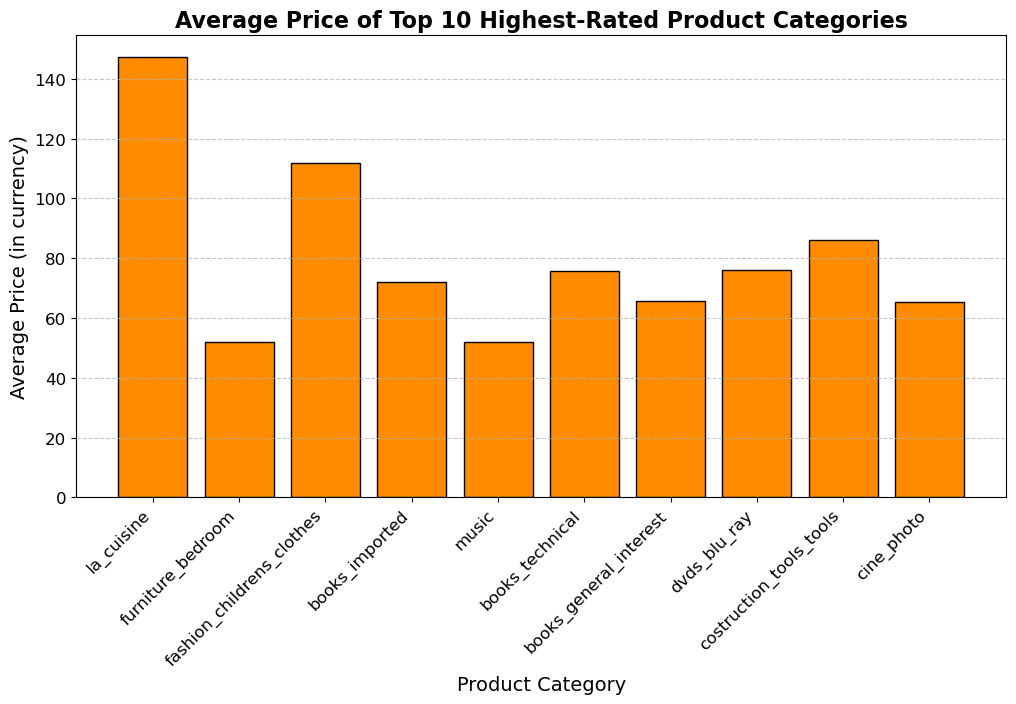

In [26]:
top_10_high_review_price = high_review_price.head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_10_high_review_price['product_category_name'], top_10_high_review_price['average_price'], 
        color='darkorange', edgecolor='black')
plt.title('Average Price of Top 10 Highest-Rated Product Categories', fontsize=16, fontweight='bold')
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Average Price (in currency)', fontsize=14)
plt.xticks(rotation=45, fontsize=12, ha='right')  
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

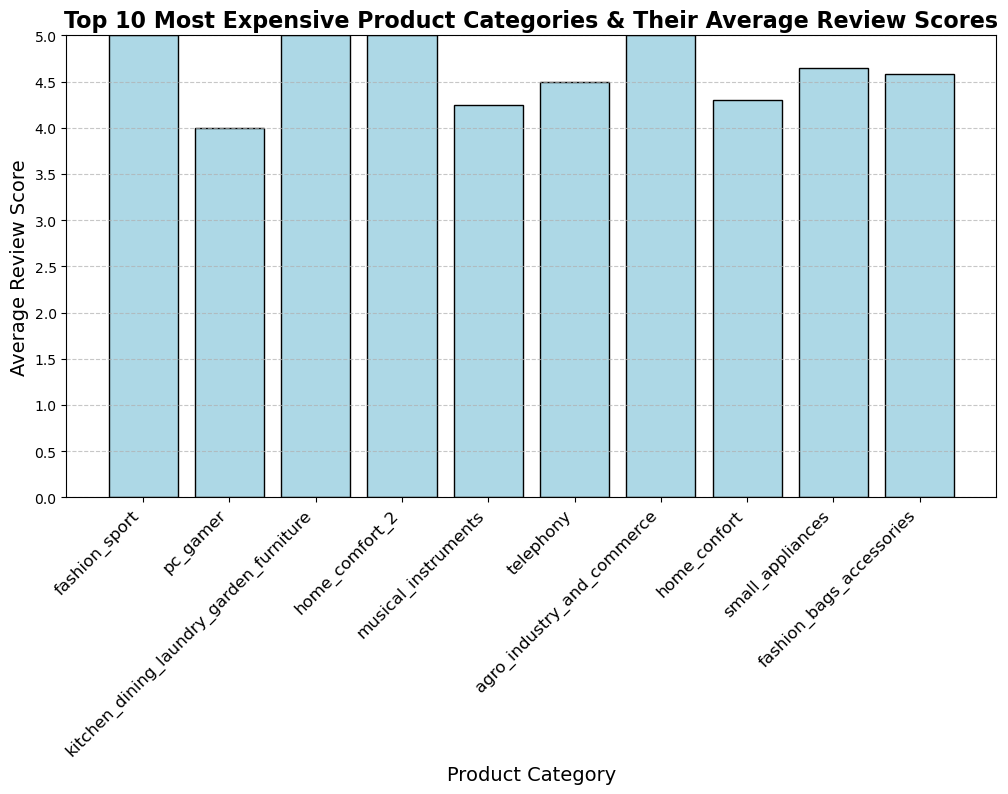

                      product_category_name  average_review_score  \
23                            fashion_sport              5.000000   
45                                 pc_gamer              4.000000   
38  kitchen_dining_laundry_garden_furniture              5.000000   
34                           home_comfort_2              5.000000   
42                      musical_instruments              4.250000   
55                                telephony              4.493590   
1                agro_industry_and_commerce              5.000000   
35                             home_confort              4.300000   
50                         small_appliances              4.650000   
21                 fashion_bags_accessories              4.586207   

    average_price  
23     238.700000  
45     238.630000  
38     238.255000  
34     237.680000  
42     236.334000  
55     229.368599  
1      229.310000  
35     223.618000  
50     222.370000  
21     216.348793  


In [27]:
price_threshold = df['total_price_prod'].quantile(0.90)  # 90th percentile
high_price_products = df[df['total_price_prod'] >= price_threshold]
high_price_reviews = high_price_products.groupby('product_category_name').agg(
    average_review_score=('review_score', 'mean'),
    average_price=('total_price_prod', 'mean')
).reset_index()
top_10_high_price_reviews = high_price_reviews.sort_values(by='average_price', ascending=False).head(10)
plt.figure(figsize=(12, 6))
plt.bar(top_10_high_price_reviews['product_category_name'], 
        top_10_high_price_reviews['average_review_score'], 
        color='lightblue', edgecolor='black')
plt.title('Top 10 Most Expensive Product Categories & Their Average Review Scores', fontsize=16, fontweight='bold')
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Average Review Score', fontsize=14)
plt.xticks(rotation=45, fontsize=12, ha='right')  
plt.yticks(np.arange(0, 5.5, 0.5))  # Review scores range from 0 to 5
plt.ylim(0, 5)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()
print(top_10_high_price_reviews)

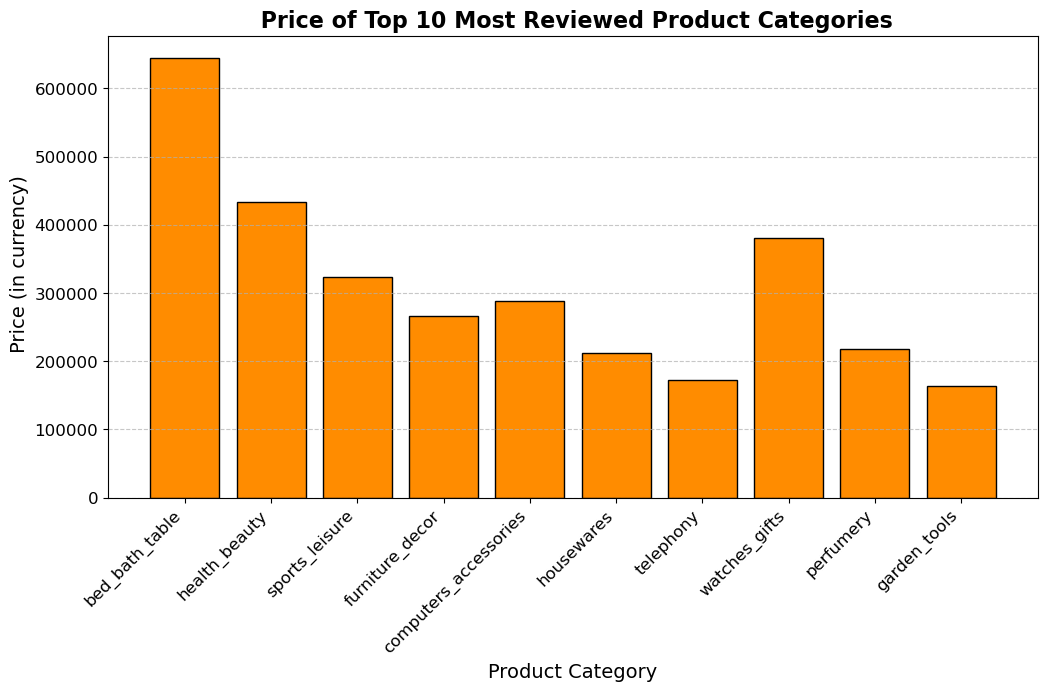

In [28]:
review_count_price = df.groupby('product_category_name').agg(
    total_reviews=('review_score', 'sum'),
    average_price=('total_price_prod', 'sum')
).reset_index()
top_10_reviewed_products = review_count_price.sort_values(by='total_reviews', ascending=False).head(10)
plt.figure(figsize=(12, 6))
plt.bar(top_10_reviewed_products['product_category_name'], 
        top_10_reviewed_products['average_price'], 
        color='darkorange', edgecolor='black')
plt.title(' Price of Top 10 Most Reviewed Product Categories', fontsize=16, fontweight='bold')
plt.xlabel('Product Category', fontsize=14)
plt.ylabel(' Price (in currency)', fontsize=14)
plt.xticks(rotation=45, fontsize=12, ha='right') 
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


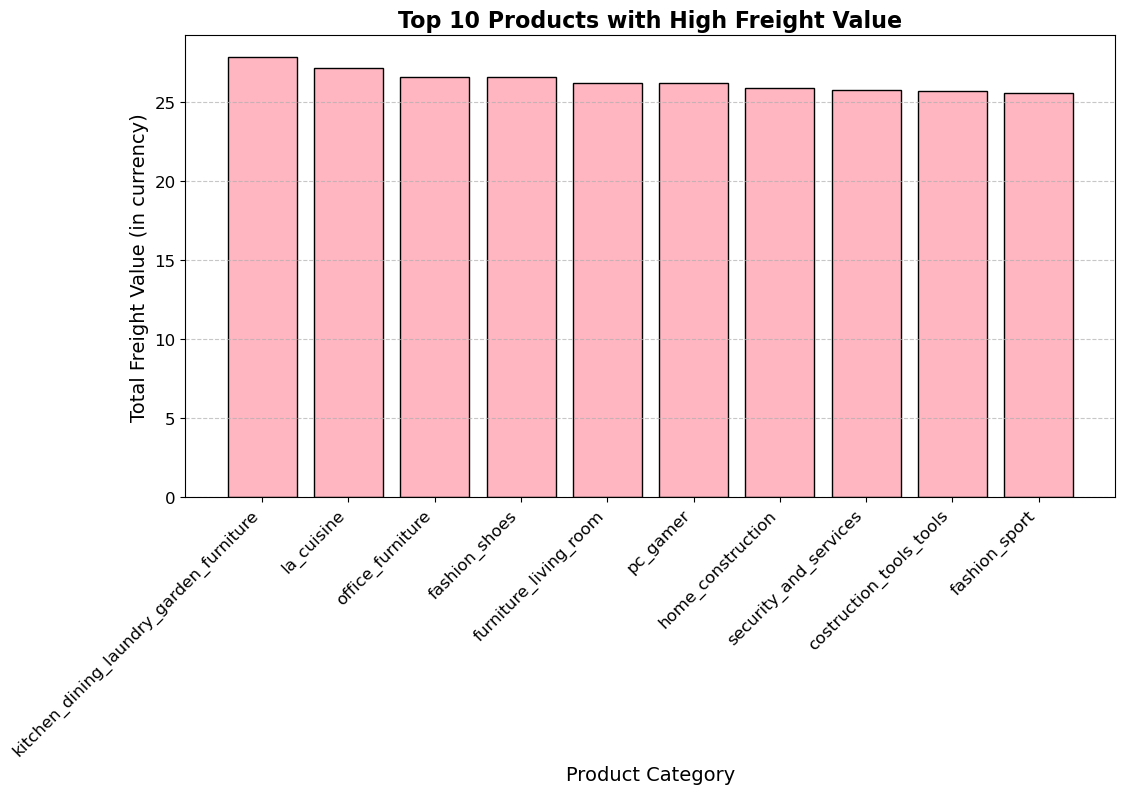

                      product_category_name  total_freight_value  total_price
46  kitchen_dining_laundry_garden_furniture            27.820000    79.730000
47                               la_cuisine            27.160000   147.150000
52                         office_furniture            26.588000   146.638000
28                            fashion_shoes            26.568125   156.499687
37                    furniture_living_room            26.197931    92.331724
54                                 pc_gamer            26.190000   156.180000
43                        home_construction            25.859643   148.522143
58                    security_and_services            25.770000   209.060000
21                  costruction_tools_tools            25.728000   155.023000
29                            fashion_sport            25.592000    67.502000


In [29]:
freight_threshold = df['freight_value'].quantile(0.90)  # 90th percentile
high_freight_products = df[df['freight_value'] >= freight_threshold]
high_freight_summary = high_freight_products.groupby('product_category_name').agg(
    total_freight_value=('freight_value', 'mean'),
    total_price=("total_price_prod","mean")
).reset_index()
top_10_high_freight = high_freight_summary.sort_values(by='total_freight_value', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_10_high_freight['product_category_name'], 
        top_10_high_freight['total_freight_value'], 
        color='lightpink', edgecolor='black')

plt.title('Top 10 Products with High Freight Value', fontsize=16, fontweight='bold')
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Total Freight Value (in currency)', fontsize=14)
plt.xticks(rotation=45, fontsize=12, ha='right')  
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()
print(top_10_high_freight)

In [30]:
total_revenue = df[df['order_status'] == 'delivered']['price'].sum() + \
                df[df['order_status'] == 'delivered']['freight_value'].sum()
expected_revenue = df[df['order_status'] != 'canceled']['price'].sum() + \
                   df[df['order_status'] != 'canceled']['freight_value'].sum()
canceled_orders = df[df['order_status'] == 'canceled'].shape[0]
mask = ((df['order_status']== 'delivered') & (df['order_delivered_customer_date'] > df['order_estimated_delivery_date']))
df['late'] = mask
late_deliveries = df[mask].shape[0]
print(f"Total Revenue: {total_revenue}")
print(f"Expected Revenue: {expected_revenue}")
print(f"Canceled Orders: {canceled_orders}")
print(f"Late Deliveries: {late_deliveries}")

Total Revenue: 4640246.3
Expected Revenue: 4668259.57
Canceled Orders: 117
Late Deliveries: 2349


In [31]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['delivery_time_days'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days
fastest_delivery_city = df.groupby('customer_city')['delivery_time_days'].mean().idxmin()
fastest_delivery_time = df.groupby('customer_city')['delivery_time_days'].mean().min()

fastest_delivery_state = df.groupby('customer_state')['delivery_time_days'].mean().idxmin()
fastest_delivery_state_time = df.groupby('customer_state')['delivery_time_days'].mean().min()

print(f"Fastest Delivery City: {fastest_delivery_city} ({fastest_delivery_time:.2f} days)")
print(f"Fastest Delivery State: {fastest_delivery_state} ({fastest_delivery_state_time:.2f} days)")


Fastest Delivery City: buenopolis (3.00 days)
Fastest Delivery State: SP (7.00 days)


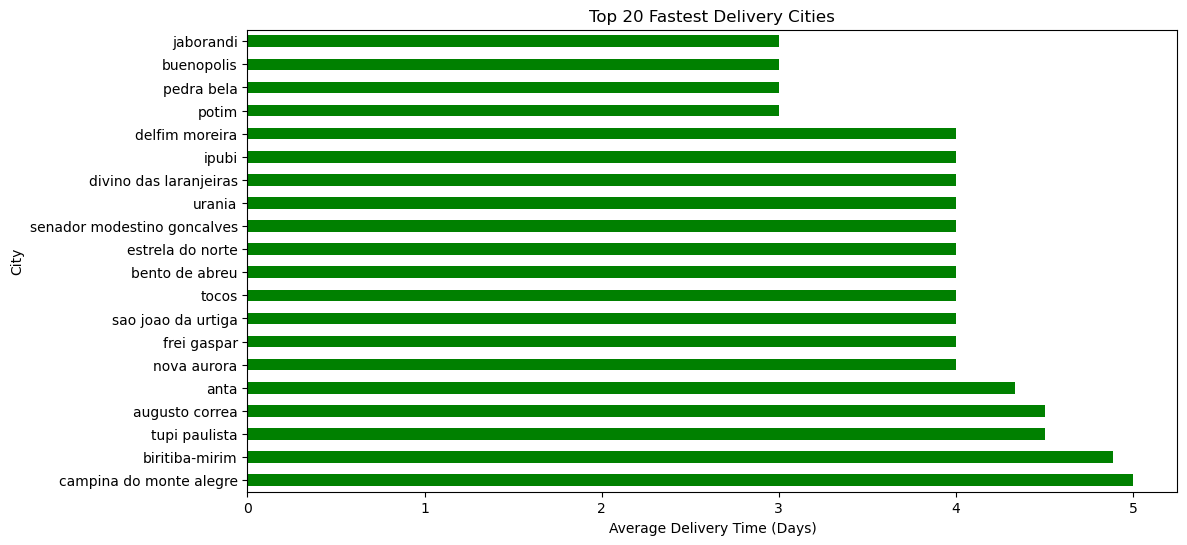

customer_city
jaborandi                      3.0
buenopolis                     3.0
pedra bela                     3.0
potim                          3.0
delfim moreira                 4.0
ipubi                          4.0
divino das laranjeiras         4.0
urania                         4.0
senador modestino goncalves    4.0
estrela do norte               4.0
Name: delivery_time_days, dtype: float64

In [32]:
# Grouped by customer city and calculated average delivery time
city_delivery_times = df.groupby('customer_city')['delivery_time_days'].mean().sort_values()

plt.figure(figsize=(12, 6))
city_delivery_times.head(20).plot(kind='barh', color='green')

plt.title('Top 20 Fastest Delivery Cities')
plt.xlabel('Average Delivery Time (Days)')
plt.ylabel('City')
plt.gca().invert_yaxis() 
plt.show()
city_delivery_times.head(10)

/tmp/ipykernel_104874/1871168301.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  late_deliveries['order_estimated_delivery_date'] = pd.to_datetime(late_deliveries['order_estimated_delivery_date'])
/tmp/ipykernel_104874/1871168301.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  late_deliveries['order_delivered_customer_date'] = pd.to_datetime(late_deliveries['order_delivered_customer_date'])
/tmp/ipykernel_104874/1871168301.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

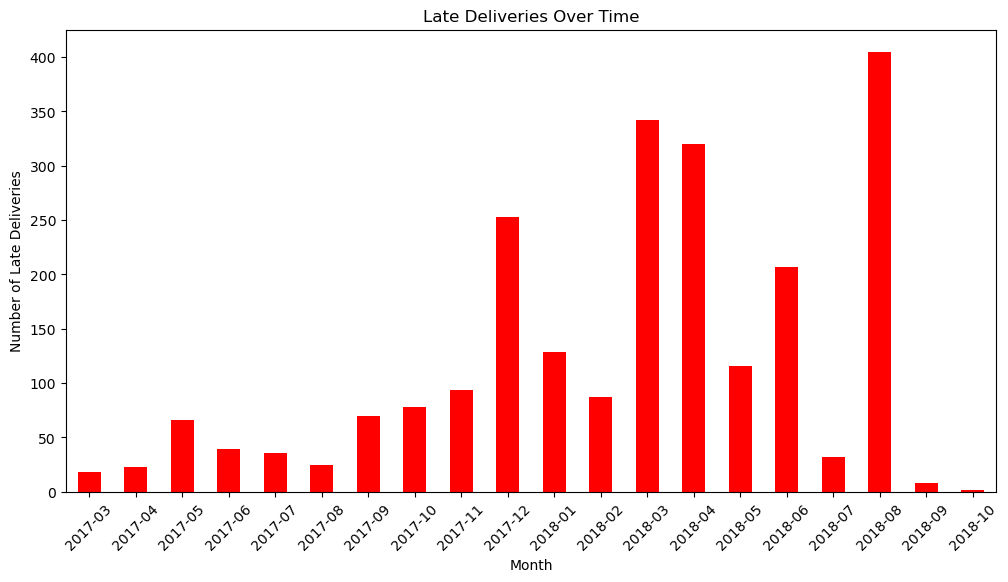

In [33]:
late_deliveries = df[df['order_delivered_customer_date'] > df['order_estimated_delivery_date']]
late_deliveries['order_estimated_delivery_date'] = pd.to_datetime(late_deliveries['order_estimated_delivery_date'])
late_deliveries['order_delivered_customer_date'] = pd.to_datetime(late_deliveries['order_delivered_customer_date'])
late_deliveries['month'] = late_deliveries['order_delivered_customer_date'].dt.to_period('M')
late_deliveries_counts = late_deliveries['month'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
late_deliveries_counts.plot(kind='bar', color='red')
plt.xlabel('Month')
plt.ylabel('Number of Late Deliveries')
plt.title('Late Deliveries Over Time')
plt.xticks(rotation=45)
plt.show()

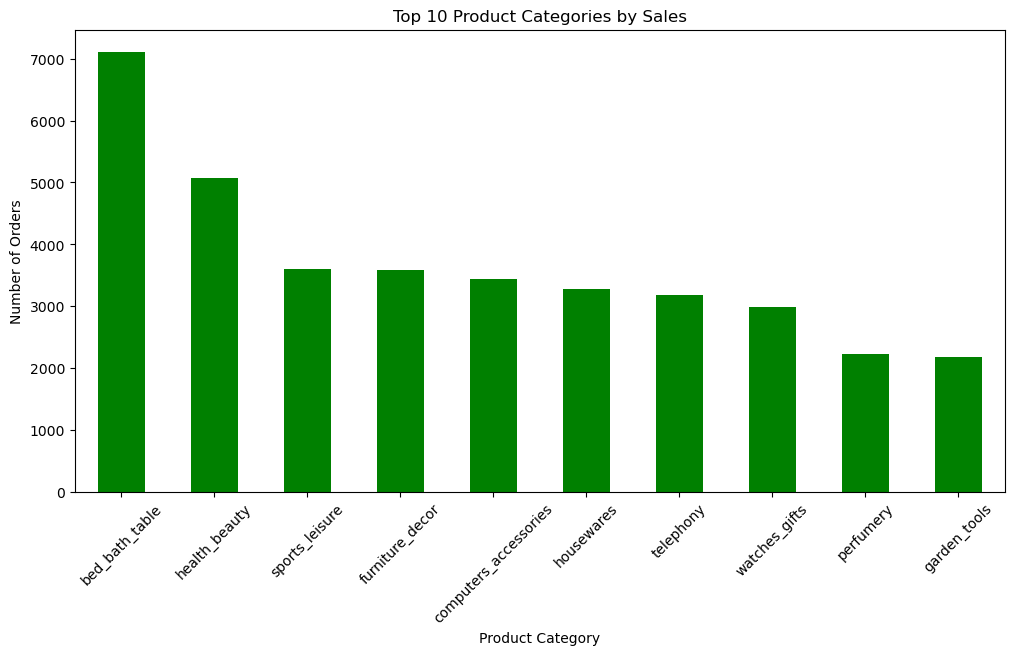

In [34]:
category_sales = df.groupby('product_category_name')['order_id'].count().sort_values(ascending=False).head(10)
category_sales.plot(kind='bar', figsize=(12, 6), color='green')
plt.title('Top 10 Product Categories by Sales')
plt.xlabel('Product Category')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

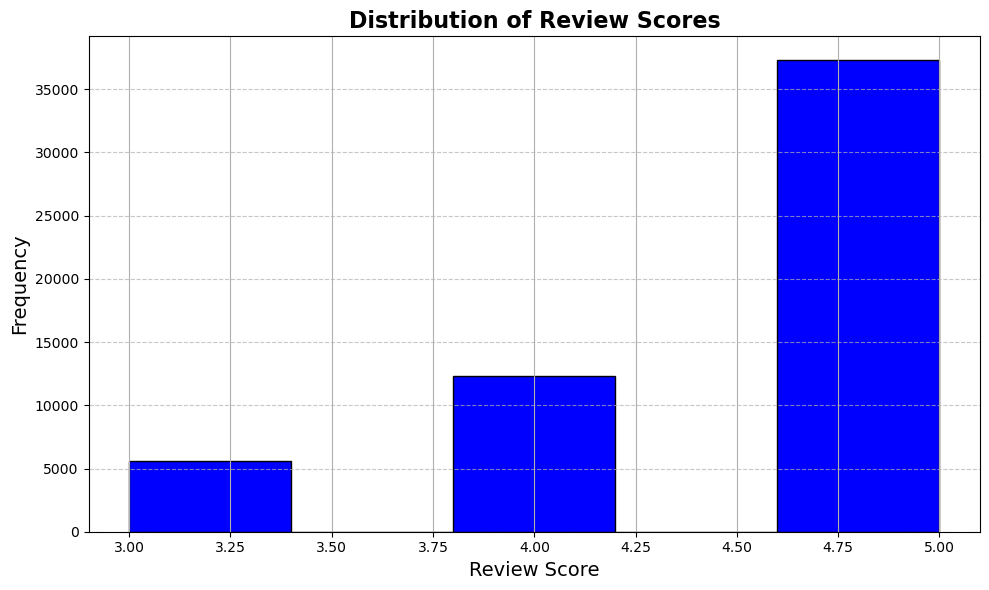

In [35]:
plt.figure(figsize=(10, 6))
df['review_score'].hist(bins=5, color="blue", edgecolor='black')
plt.title('Distribution of Review Scores', fontsize=16, fontweight='bold')
plt.xlabel('Review Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


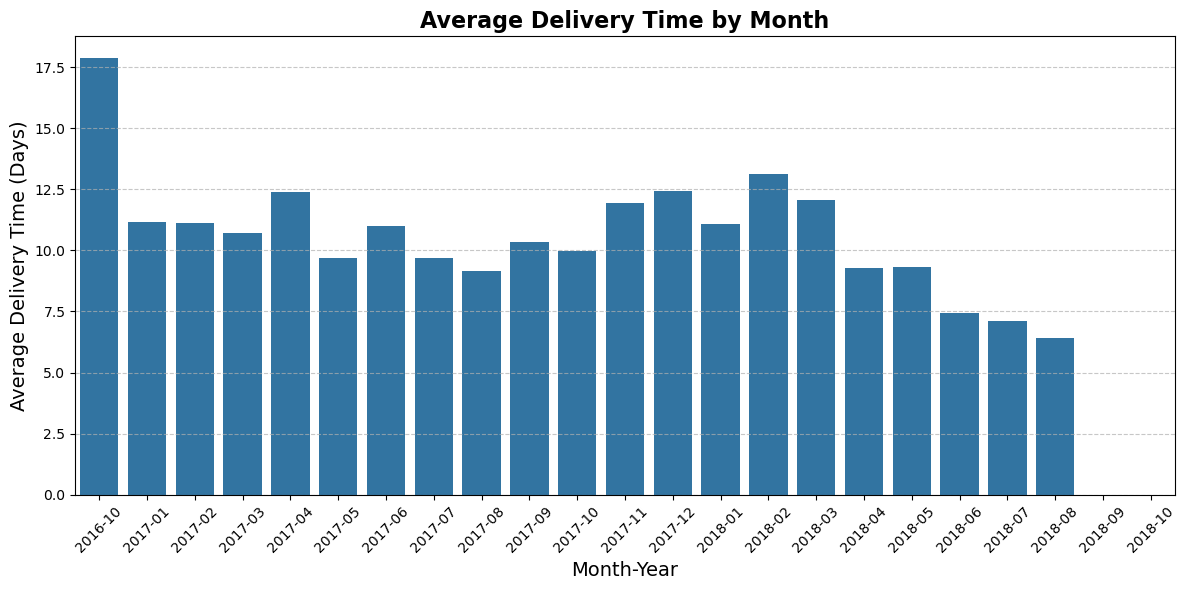

In [36]:
df['delivery_time'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days
df['delivery_time']=df["delivery_time"].fillna(0)
df['month_year'] = df['order_purchase_timestamp'].dt.to_period('M')
monthly_delivery_time = df.groupby('month_year')['delivery_time'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='month_year', y='delivery_time', data=monthly_delivery_time)
plt.title('Average Delivery Time by Month', fontsize=16, fontweight='bold')
plt.xlabel('Month-Year', fontsize=14)
plt.ylabel('Average Delivery Time (Days)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

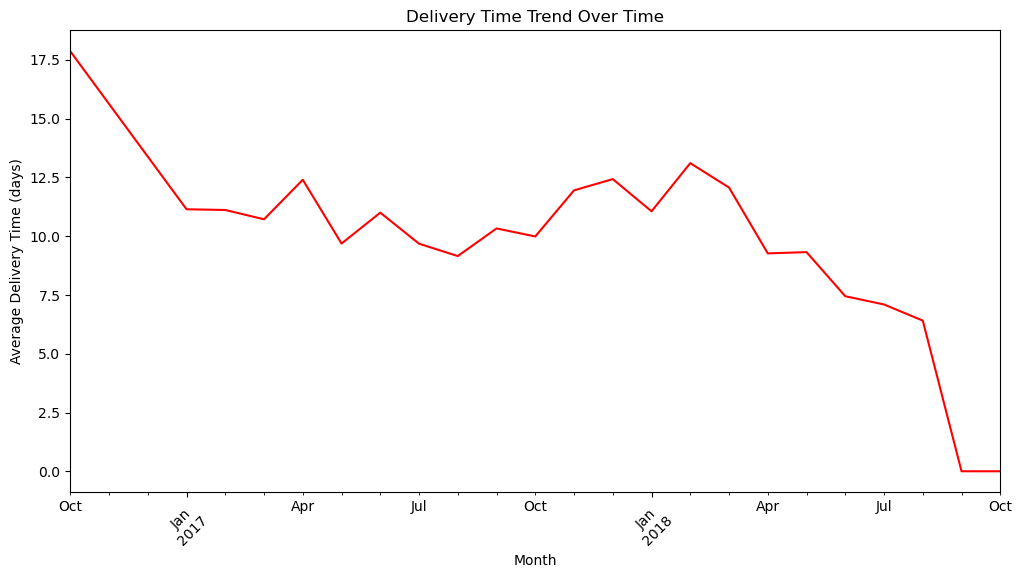

In [37]:
df['delivery_time'] = pd.to_numeric(df['delivery_time'], errors='coerce')  # Convert delivery time to numeric if necessary
df['month'] = df['order_purchase_timestamp'].dt.to_period('M')
delivery_trend = df.groupby('month')['delivery_time'].mean()
delivery_trend.plot(kind='line', figsize=(12, 6), color='red')
plt.title('Delivery Time Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Average Delivery Time (days)')
plt.xticks(rotation=45)
plt.show()

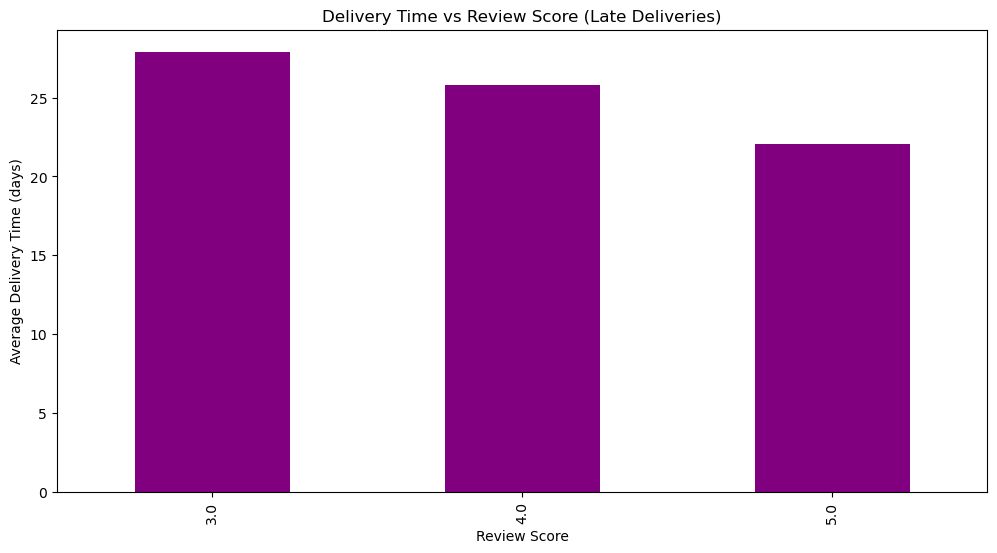

In [38]:
late_deliveries = df[df['order_delivered_customer_date'] > df['order_estimated_delivery_date']]
late_reviews = late_deliveries.groupby('review_score')['delivery_time'].mean()
late_reviews.plot(kind='bar', figsize=(12, 6), color='purple')
plt.title('Delivery Time vs Review Score (Late Deliveries)')
plt.xlabel('Review Score')
plt.ylabel('Average Delivery Time (days)')
plt.show()


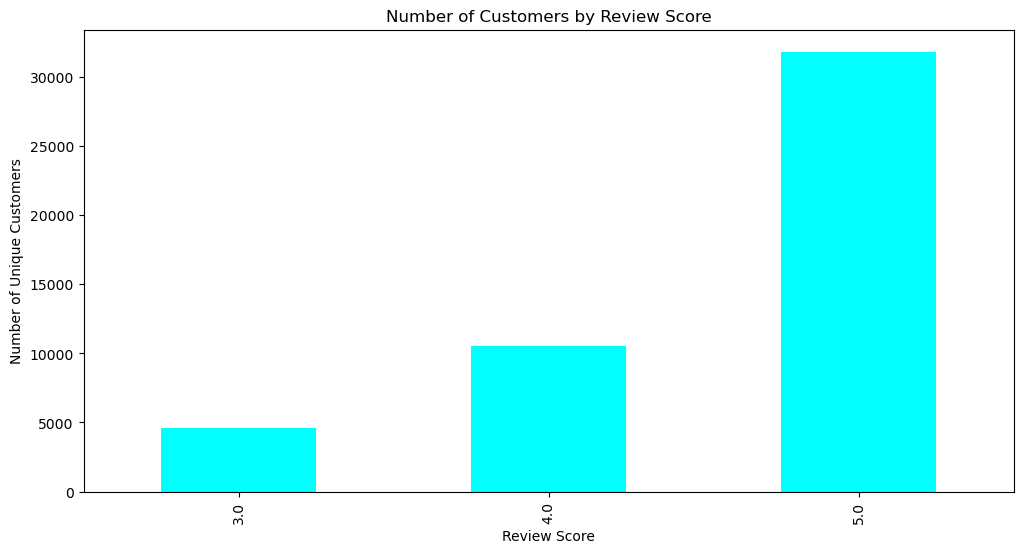

In [39]:
review_segmentation = df.groupby('review_score')['customer_id'].nunique()
review_segmentation.plot(kind='bar', figsize=(12, 6), color='cyan')
plt.title('Number of Customers by Review Score')
plt.xlabel('Review Score')
plt.ylabel('Number of Unique Customers')
plt.show()


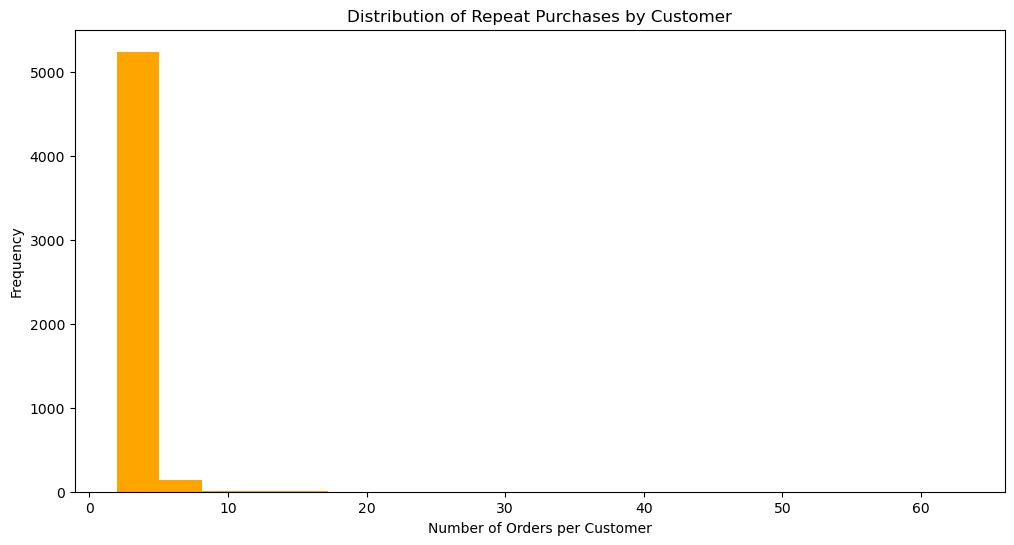

In [40]:
repeat_customers = df.groupby('customer_id')['order_id'].count()
repeat_customers = repeat_customers[repeat_customers > 1]  # Customers with more than one purchase
repeat_customers.plot(kind='hist', bins=20, figsize=(12, 6), color='orange')
plt.title('Distribution of Repeat Purchases by Customer')
plt.xlabel('Number of Orders per Customer')
plt.ylabel('Frequency')
plt.show()

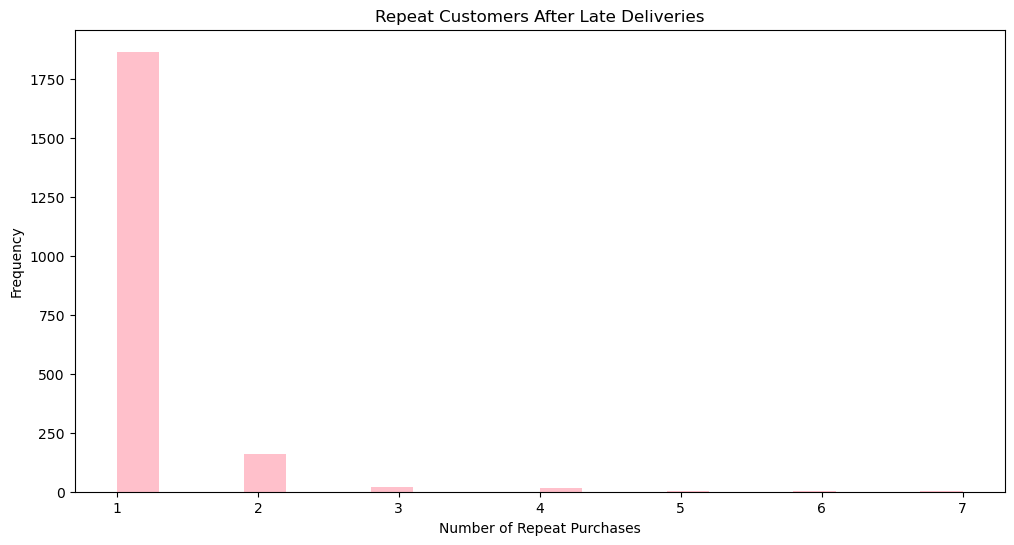

In [41]:
late_repeat_customers = late_deliveries['customer_id'].value_counts()
late_repeat_customers.plot(kind='hist', bins=20, figsize=(12, 6), color='pink')
plt.title('Repeat Customers After Late Deliveries')
plt.xlabel('Number of Repeat Purchases')
plt.ylabel('Frequency')
plt.show()

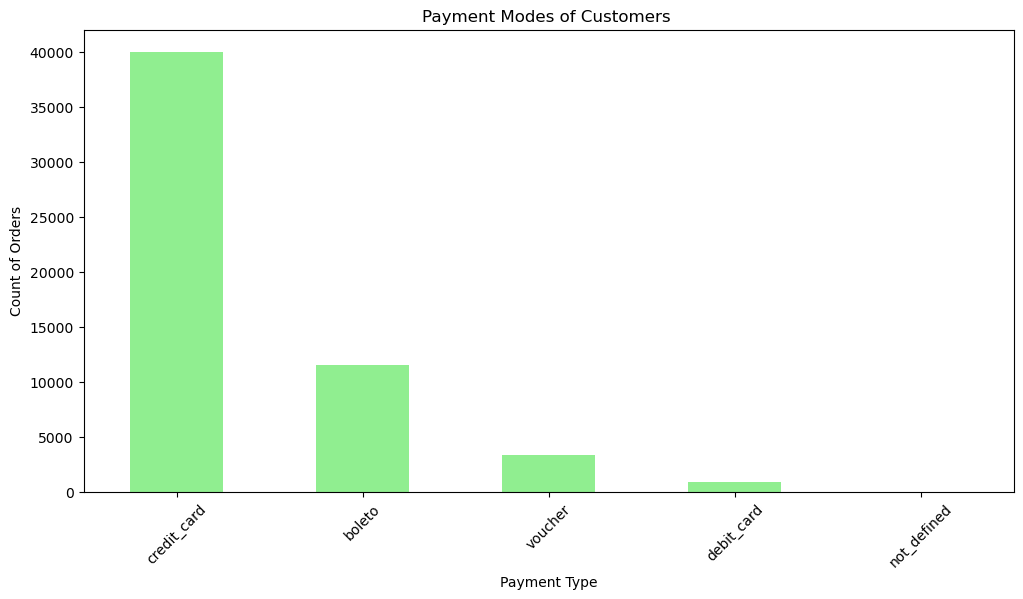

In [42]:
# Grouped by payment type to find which payment is most used
payment_mode_distribution = df['payment_type'].value_counts()
payment_mode_distribution.plot(kind='bar', figsize=(12, 6), color='lightgreen')
plt.title('Payment Modes of Customers ')
plt.xlabel('Payment Type')
plt.ylabel('Count of Orders')
plt.xticks(rotation=45)
plt.show()


In [43]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['delivery_time_days'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days
fastest_delivery_city = df.groupby('customer_city')['delivery_time_days'].mean().idxmin()
fastest_delivery_time = df.groupby('customer_city')['delivery_time_days'].mean().min()
fastest_delivery_state = df.groupby('customer_state')['delivery_time_days'].mean().idxmin()
fastest_delivery_state_time = df.groupby('customer_state')['delivery_time_days'].mean().min()

print(f"Fastest Delivery City: {fastest_delivery_city} ({fastest_delivery_time:.2f} days)")
print(f"Fastest Delivery State: {fastest_delivery_state} ({fastest_delivery_state_time:.2f} days)")


Fastest Delivery City: buenopolis (3.00 days)
Fastest Delivery State: SP (7.00 days)


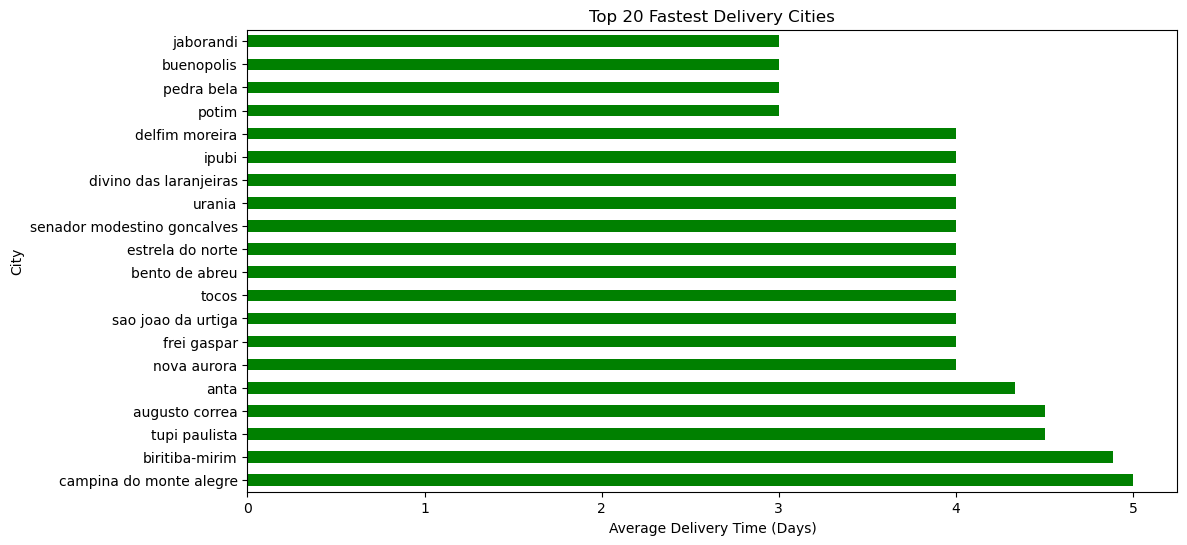

In [44]:
# Grouped by customer city and calculated average delivery time
city_delivery_times = df.groupby('customer_city')['delivery_time_days'].mean().sort_values()

plt.figure(figsize=(12, 6))
city_delivery_times.head(20).plot(kind='barh', color='green')

plt.title('Top 20 Fastest Delivery Cities')
plt.xlabel('Average Delivery Time (Days)')
plt.ylabel('City')
plt.gca().invert_yaxis() 
plt.show()


/tmp/ipykernel_104874/1189480307.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_delivery_times.index, y=state_delivery_times.values, palette="coolwarm")


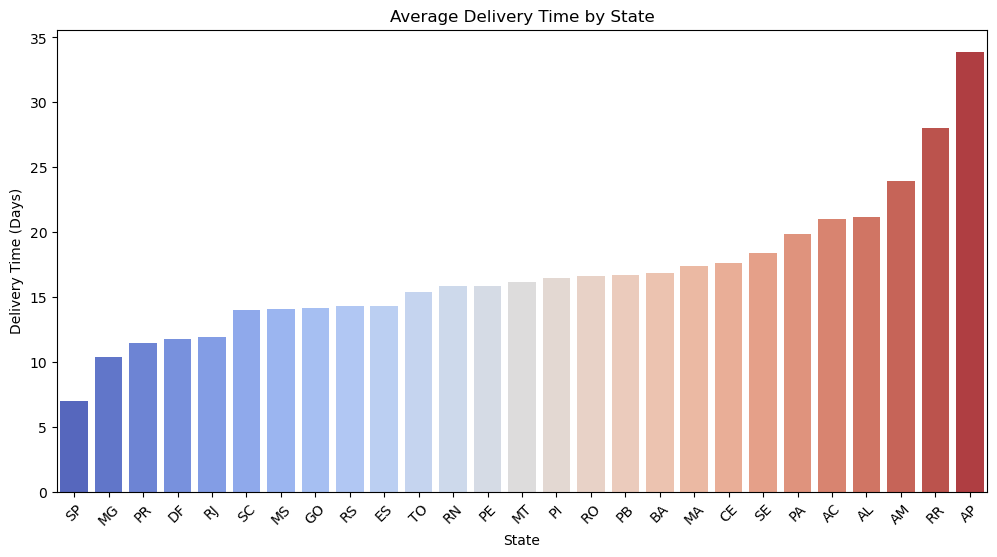

In [45]:
# Grouped by state and calculated average delivery time
state_delivery_times = df.groupby('customer_state')['delivery_time_days'].mean().sort_values()

plt.figure(figsize=(12, 6))
sns.barplot(x=state_delivery_times.index, y=state_delivery_times.values, palette="coolwarm")

plt.title('Average Delivery Time by State')
plt.xlabel('State')
plt.ylabel('Delivery Time (Days)')
plt.xticks(rotation=45)
plt.show()


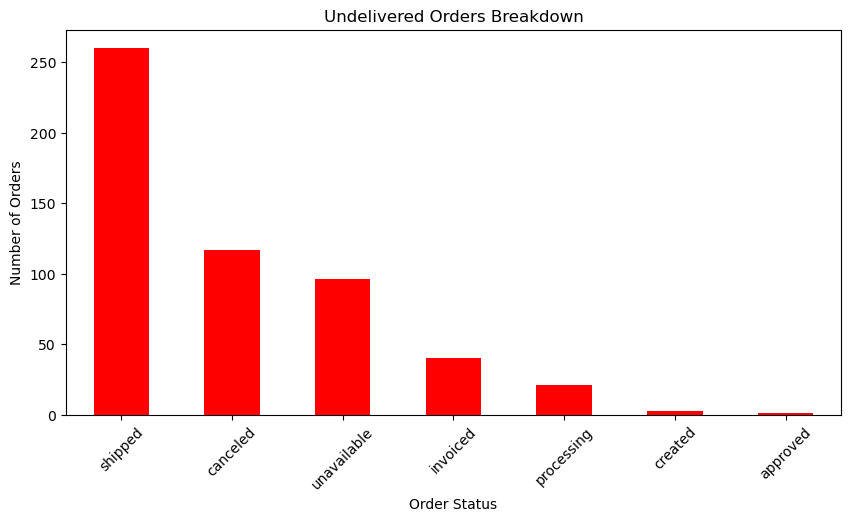

In [46]:
#Checked how many orders are only shipped not delivered
undelivered_counts = df[df['order_status'] != 'delivered']['order_status'].value_counts()
undelivered_counts.plot(kind='bar', color='red', figsize=(10, 5))

plt.title('Undelivered Orders Breakdown')
plt.xlabel('Order Status')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()


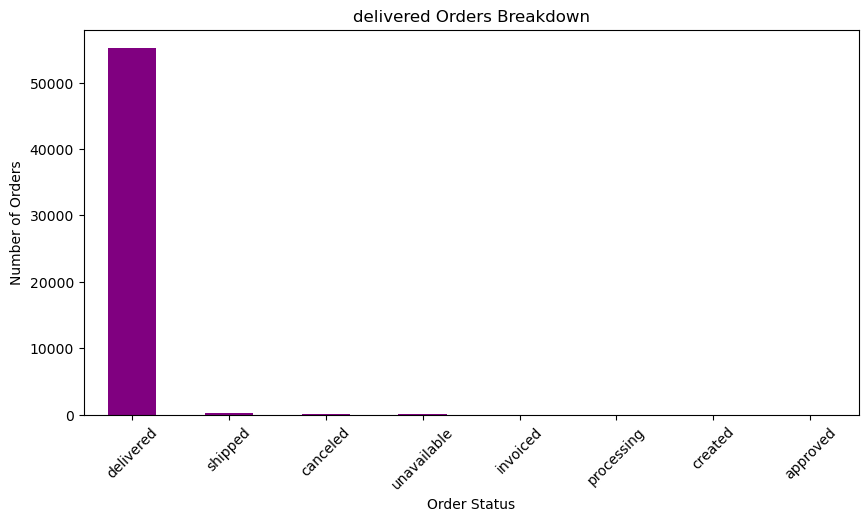

In [47]:
#Checked the rate of delivered which is very high
delivered_counts = df['order_status'].value_counts()
delivered_counts.plot(kind='bar', color='purple', figsize=(10, 5))

plt.title('delivered Orders Breakdown')
plt.xlabel('Order Status')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()


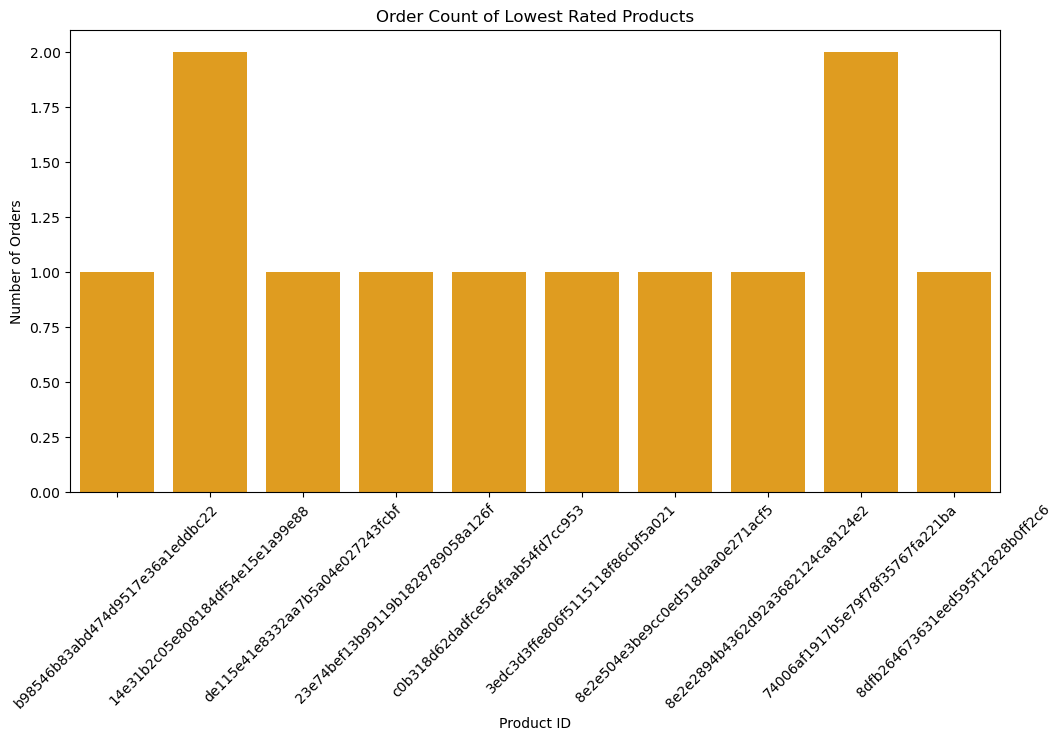

In [48]:
# Grouped by product id and calculated the average rating and order count
product_ratings = df.groupby('product_id').agg(
    avg_rating=('review_score', 'mean'),
    order_count=('product_id', 'count')  # Counted how many times the product appears
).sort_values('avg_rating')

# Selected the bottom 10 lowest-rated products
lowest_rated_products = product_ratings.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=lowest_rated_products.index, y=lowest_rated_products['order_count'], color="orange")

plt.title('Order Count of Lowest Rated Products')
plt.xlabel('Product ID')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)

plt.show()


In [49]:
df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_city', 'customer_state', 'review_id',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'payment_type',
       'product_id', 'seller_id', 'shipping_limit_date',
       'product_category_name', 'seller_city', 'seller_state',
       'customer_zip_code_prefix', 'review_score', 'payment_sequential',
       'payment_installments', 'payment_value', 'order_item_id', 'price',
       'freight_value', 'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'seller_zip_code_prefix',
       'order_month', 'total_price_prod', 'late', 'delivery_time_days',
       'delivery_time

In [50]:
date_cols = ['order_purchase_timestamp', 'order_approved_at', 
             'order_delivered_customer_date', 'order_delivered_carrier_date']
df[date_cols] = df[date_cols].apply(pd.to_datetime)

df['delivery_time_days'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days
df['carrier_delivery_days'] = (df['order_delivered_carrier_date'] - df['order_purchase_timestamp']).dt.days

avg_delivery_time = df.groupby(['product_id', 'customer_city'])['delivery_time_days'].mean().reset_index()
avg_carrier_time = df.groupby(['product_id', 'customer_city'])['carrier_delivery_days'].mean().reset_index()

avg_delivery_time.rename(columns={'delivery_time_days': 'avg_delivery_days'}, inplace=True)
avg_carrier_time.rename(columns={'carrier_delivery_days': 'avg_carrier_days'}, inplace=True)

df = df.merge(avg_delivery_time, on=['product_id', 'customer_city'], how='left')
df = df.merge(avg_carrier_time, on=['product_id', 'customer_city'], how='left')
df = df.dropna(subset=['avg_delivery_days', 'avg_carrier_days'])
df['order_delivered_customer_date'] = df.apply(
    lambda row: row['order_approved_at'] + pd.Timedelta(days=row['avg_delivery_days'])
    if pd.isnull(row['order_delivered_customer_date']) else row['order_delivered_customer_date'], 
    axis=1
)

df['order_delivered_carrier_date'] = df.apply(
    lambda row: row['order_approved_at'] + pd.Timedelta(days=row['avg_carrier_days'])
    if pd.isnull(row['order_delivered_carrier_date']) else row['order_delivered_carrier_date'], 
    axis=1
)

df.drop(columns=['avg_delivery_days', 'avg_carrier_days'], inplace=True)

In [51]:
df['avg_delivery_days'].isna().sum()

KeyError: 'avg_delivery_days'

In [ ]:
df.columns